In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("2-wheeler-EV-bikewale.csv")

In [3]:
data1.head()

,review,Used_it_for,Owned_for,Ridden_for,rating,Visual_Appeal,Reliability,Performance,Service_Experience,Extra_Features,Comfort,Maintenance_cost,Value_for_Money,Model_Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [4]:
data1.Maintenance_cost.isnull().sum()

664

In [5]:
data1.Performance.isnull().sum()

499

### since both of the above feature have more than 75 percent null value and hence will not contribute to the information gain so droping them

In [6]:
data1 = data1.drop(['Performance','Extra_Features','Maintenance_cost','Model_Name'],axis=1)

In [7]:
data1['Owned_for'].value_counts()


< 3 months            220
> 1 yr                203
Never owned           175
6 months-1 yr         134
3-6 months            111
Occasional Commute      1
Name: Owned_for, dtype: int64

### Removing records for the never own vehicles

In [8]:
data1 = data1[data1['Owned_for'] != 'Never owned'].reset_index(drop=True)

In [9]:
data1

,review,Used_it_for,Owned_for,Ridden_for,rating,Visual_Appeal,Reliability,Service_Experience,Comfort,Value_for_Money
0,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,3.0
1,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,2.0,5.0,2.0
2,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,1.0,1.0,1.0
3,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,1.0,3.0,2.0
4,First 7k kms no issues.\nLater rear wheel had ...,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...
664,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,2.0,2.0,3.0
665,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,NaN,NaN
666,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,2.0,NaN,NaN
667,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,4.0,5.0


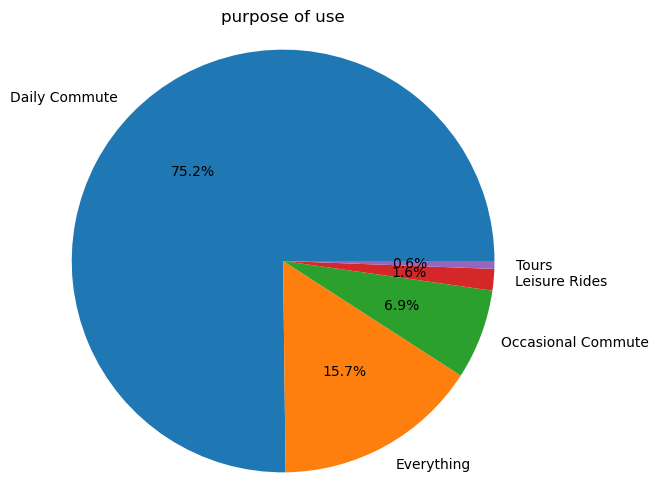

In [10]:
plt.figure(figsize=(6,6))
value_counts = data1['Used_it_for'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("purpose of use")
plt.axis('equal')  
plt.show()

*  ****from the above plot we can see people prefered ev for daily commute and everything purposes****

## Psychographic Segmentation:

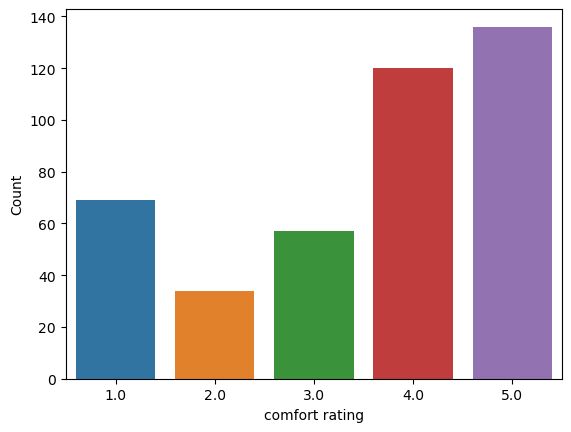

In [11]:
sns.countplot(data=data1, x='Comfort')
plt.xlabel('comfort rating')
plt.ylabel('Count')
plt.show()


* **from the above plot we can see the number of rating higher for the comfort
   with rating 5 & 4.**
 *  **that means people like the comfort.**

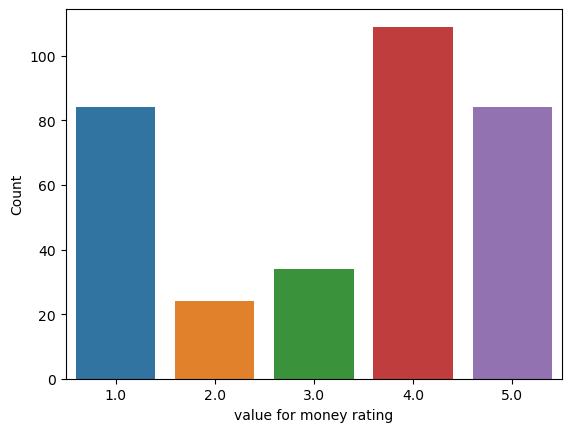

In [12]:
sns.countplot(data=data1, x='Value_for_Money')
plt.xlabel('value for money rating')
plt.ylabel('Count')
plt.show()


* **From the above plot we can see the number of people who rated good(i.e 4 &5) 
    for the value for money is high,**
* **that means there are segment of peaple who sought for value for money**

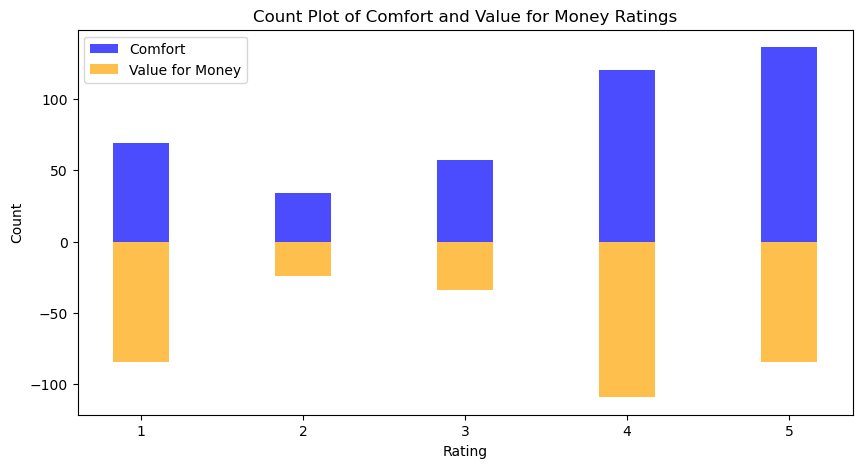

In [13]:

comfort_counts = data1['Comfort'].value_counts().sort_index()
value_for_money_counts = data1['Value_for_Money'].value_counts().sort_index()
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(comfort_counts.index , comfort_counts, width=bar_width, color='blue', alpha=0.7, label='Comfort')
ax.bar(value_for_money_counts.index, -value_for_money_counts, width=bar_width,
       color='orange', alpha=0.7, label='Value for Money')

ax.set_title('Count Plot of Comfort and Value for Money Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

plt.legend()
plt.show()

   * from the above graph we can see the people prefering both comfort and value for money.
   * It is clear that people want both value for money and comfort

In [14]:
data1.head()

,review,Used_it_for,Owned_for,Ridden_for,rating,Visual_Appeal,Reliability,Service_Experience,Comfort,Value_for_Money
0,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,3.0
1,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,2.0,5.0,2.0
2,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,1.0,1.0,1.0
3,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,1.0,3.0,2.0
4,First 7k kms no issues.\nLater rear wheel had ...,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,1.0,5.0,2.0


In [15]:
data1['review'] = data1['review'].fillna('')  # Replace NaN values with an empty string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [16]:
data1['review'] = data1['review'].apply(transform_text)

In [17]:
data1.head()

,review,Used_it_for,Owned_for,Ridden_for,rating,Visual_Appeal,Reliability,Service_Experience,Comfort,Value_for_Money
0,perform poor bike charg problem big thing wort...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,3.0
1,purchas april 2022 sale staff clueless new veh...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,2.0,5.0,2.0
2,issu come scooti part avail servic centr wait ...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,1.0,1.0,1.0
3,buy vehicl unless near tv iqub servic center g...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,1.0,3.0,2.0
4,first 7k km issu later rear wheel bend wait ne...,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,1.0,5.0,2.0


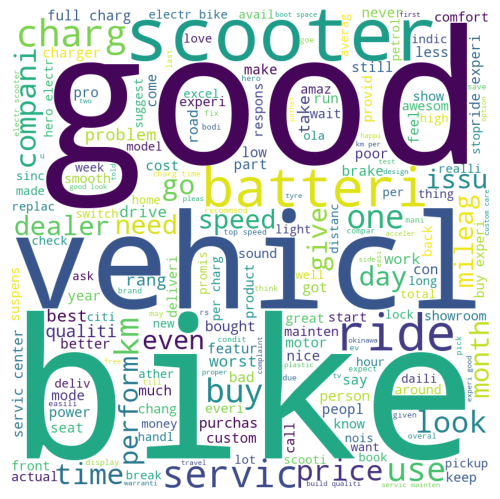

In [18]:

wc = WordCloud(width = 800, height = 800,
                background_color ='white',
               
                min_font_size = 10)

spam_wc = wc.generate(data1[data1['Ridden_for'] == "< 5000 kms"]['review'].str.cat(sep =" "))

plt.imshow(spam_wc)
plt.axis("off")
plt.tight_layout(pad=0)

In [19]:
word_corpus = []
for words in data1[data1['Ridden_for'] == "< 5000 kms"]['review'].tolist():
    for word in words.split():
        word_corpus.append(word)


In [20]:
from collections import Counter

In [21]:
Counter(word_corpus).most_common(20)

[('bike', 410),
 ('good', 394),
 ('charg', 320),
 ('servic', 312),
 ('ride', 292),
 ('scooter', 286),
 ('batteri', 269),
 ('vehicl', 267),
 ('km', 256),
 ('buy', 200),
 ('speed', 182),
 ('look', 176),
 ('experi', 176),
 ('also', 161),
 ('time', 159),
 ('use', 148),
 ('one', 144),
 ('qualiti', 139),
 ('like', 138),
 ('compani', 131)]

* **from the above list we can see the most frequent words used are batteries, service, speed ,looks and all, so the  startup company has to meet these compatibilty**

## Geographic segmentation:

In [29]:
state_data = pd.read_csv("statewise_sale.csv")

In [43]:
state_data

,Sl. No,State/UT,Till date State wise - Total Number of Vehicles Registered,Till date State wise - Total Vehicle Registered as Electric,Proportion of Electric Vehicle
0,1,Andaman and Nicobar Island,160375,186,0.12
1,2,Andhra Pradesh,16517516,66500,0.40
2,3,Arunachal Pradesh,299371,25,0.01
3,4,Assam,5393542,116605,2.16
4,5,Bihar,11728184,155457,1.33
5,6,Chandigarh,843049,7628,0.90
6,7,Chhattisgarh,7431353,52813,0.71
7,8,Delhi,8457200,229305,2.71
8,9,Goa,1204110,12139,1.01
9,10,Gujarat,22799866,134273,0.59


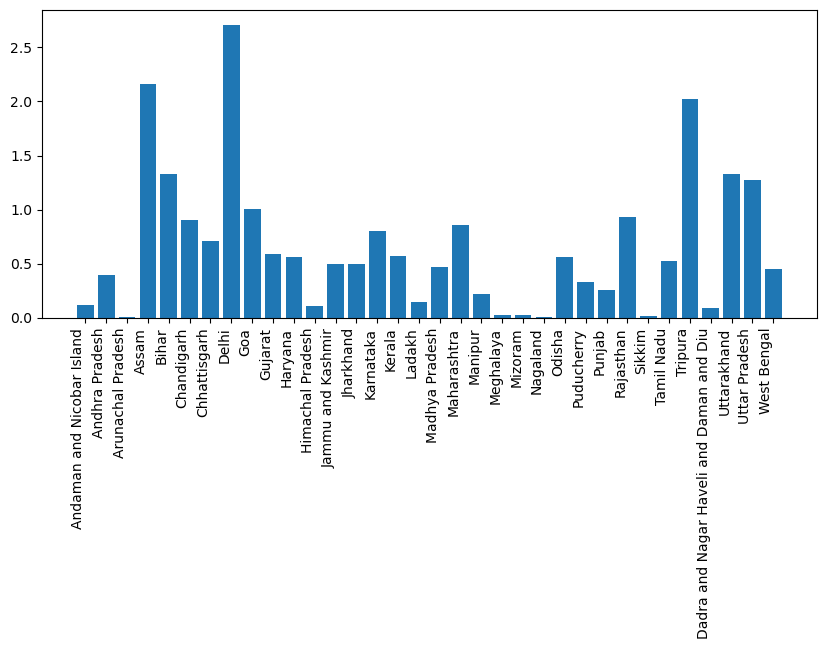

In [30]:
plt.figure(figsize=(10, 4))
plt.bar(state_data['State/UT'][:34], state_data['Proportion of Electric Vehicle'][:34])
plt.xticks(rotation=90, ha='right')
plt.show()

* We can se from the above graph there are some state where proportion of EVs is very less.
* So for a startup it will be easy wehere the ratio is less.
* So the startup company can start spreading the value of the EV adoption in those states.
* And the next step is to study the purpose of the evs in those state and build customized ev based on the study.

In [31]:
geo_data = pd.read_excel("Ev_Sales.xlsx")

In [32]:
geo_data

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048


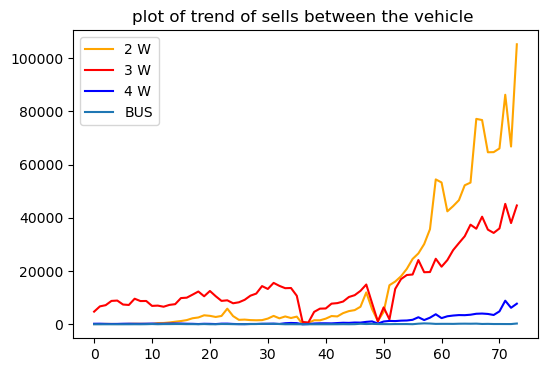

In [34]:
plt.figure(figsize=(6,4))
plt.plot(geo_data['2 W'], color = 'orange')
plt.plot(geo_data['3 W'], color = 'red')
plt.plot(geo_data['4 W'], color = 'blue')
plt.plot(geo_data['BUS'])
plt.title('plot of trend of sells between the vehicle ')
plt.legend(geo_data.columns[1:])
plt.show()

* From the above trend plot we can see the rate of rise of 2 wheeler EVs sales is higher among others.
* So the startup company should focus on the 2W EVs to poot foot in the EV market.

## Aplying pca

#### data cleaning for performing pca

In [22]:
data = data1.iloc[:, 5:10]

In [24]:
data = data.dropna()

In [23]:
data

,Visual_Appeal,Reliability,Service_Experience,Comfort,Value_for_Money
0,3.0,1.0,1.0,3.0,3.0
1,4.0,4.0,2.0,5.0,2.0
2,1.0,1.0,1.0,1.0,1.0
3,3.0,4.0,1.0,3.0,2.0
4,5.0,1.0,1.0,5.0,2.0
...,...,...,...,...,...
664,2.0,2.0,2.0,2.0,3.0
665,5.0,5.0,5.0,NaN,NaN
666,2.0,2.0,2.0,NaN,NaN
667,4.0,4.0,NaN,4.0,5.0


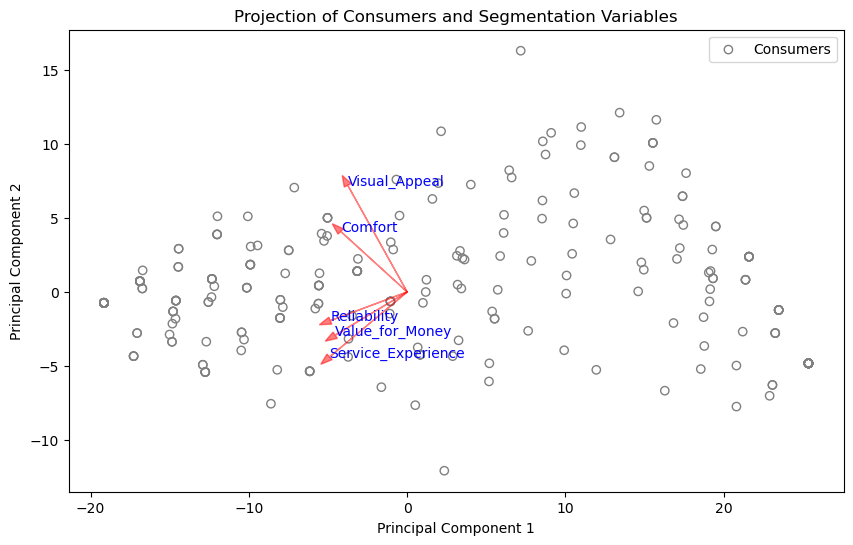

In [28]:
pca = PCA()
pca = pca.fit(data)

projected_data = pca.transform(data)[:, :2]


plt.figure(figsize=(10,6))
plt.scatter(projected_data[:, 0]*5, projected_data[:, 1]*5, color='grey', 
            label='Consumers', marker='o', facecolor='none')

for i, var in enumerate(pca.components_[:].T):  # considering only first two components
    plt.arrow(0, 0, var[0]*10, var[1]*10, color='red', alpha= 0.5, width=0.001, head_width=0.5)
    plt.text(var[0]*10, var[1]*10, data.columns[i],color = 'blue', fontsize='medium')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Consumers and Segmentation Variables')
plt.legend()
plt.show()

## Segment extraction

### Using elbow method to decide the number of clusters

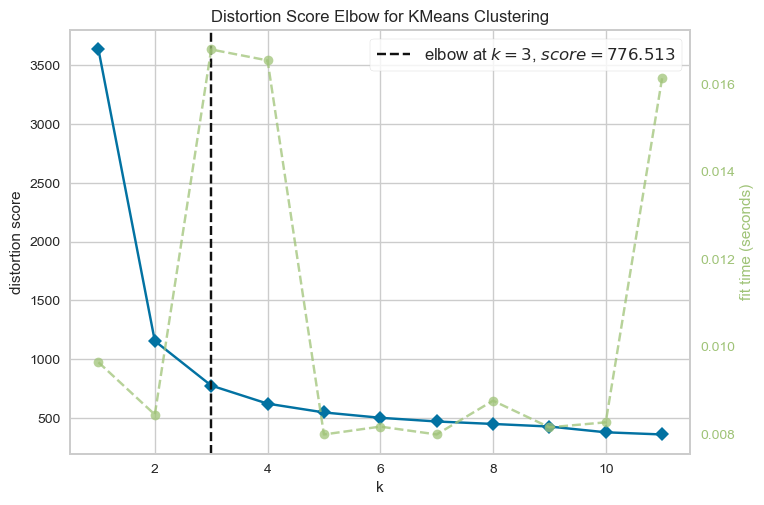

In [61]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show();

### Aplying K-meands with 3 clusters

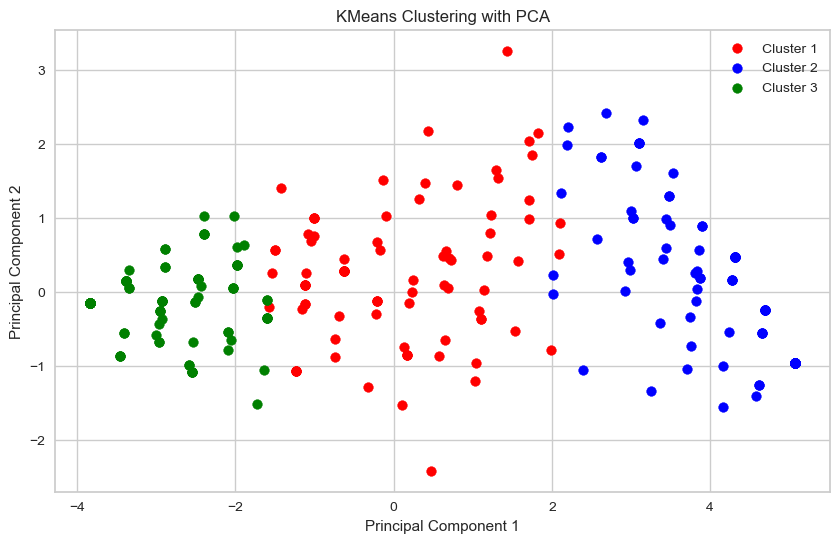

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

clusters = kmeans.predict(data)

cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_colors = ['red', 'blue', 'green']
plt.figure(figsize=(10, 6))
for cluster_idx in range(3):
    cluster_mask = clusters == cluster_idx
    plt.scatter(projected_data[cluster_mask, 0], projected_data[cluster_mask, 1], c=cluster_colors[cluster_idx], label=cluster_names[cluster_idx])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.legend()
plt.show()

## Segment profiling

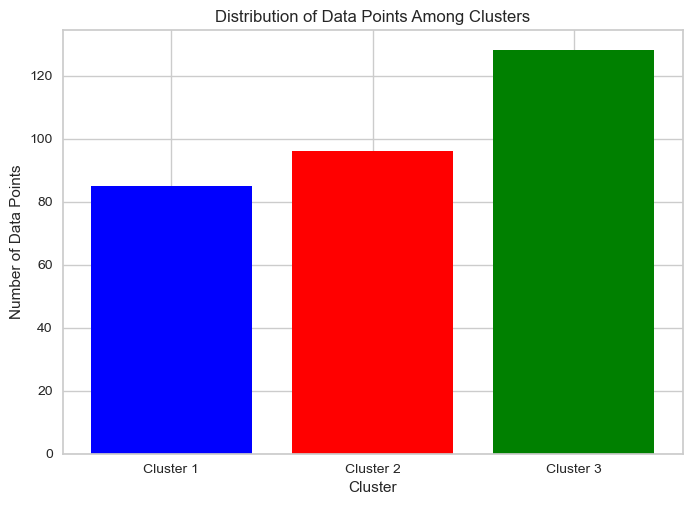

In [69]:

cluster_counts = Counter(clusters)

plt.bar(cluster_counts.keys(), cluster_counts.values(), color=['red', 'blue', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Among Clusters')
plt.xticks(range(3), ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()